0-norm: 7.0
1-norm: 3.79452032284
0.5-norm: 24.1019355796


/home/anon/anaconda2/lib/python2.7/site-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


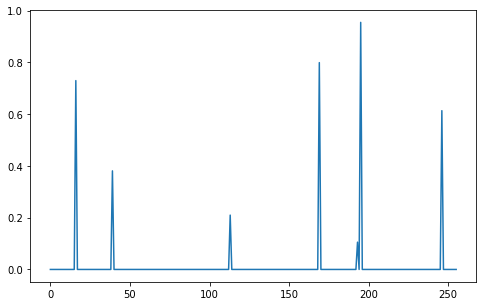

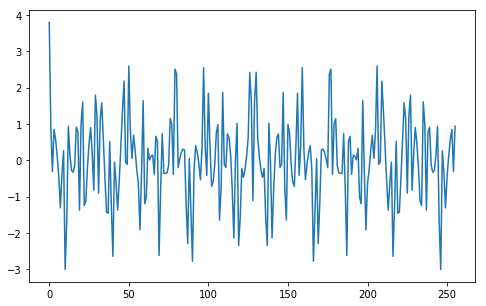

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft, ifft

x = np.zeros(256)
indices = np.random.choice(256, 7, replace=False)
for index in indices:
    x[index] = np.random.uniform()

fig, ax = plt.subplots(figsize=(8, 5))
plt.plot(x)
print("0-norm: " + str(np.linalg.norm(x, ord=0)))
print("1-norm: " + str(np.linalg.norm(x, ord=1)))
print("0.5-norm: " + str(np.linalg.norm(x, ord=0.5)))

fourier_transform = fft(x)
fig, ax = plt.subplots(figsize=(8, 5))
plt.plot(fourier_transform)

/home/anon/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:3: ComplexWarning: Casting complex values to real discards the imaginary part
  app.launch_new_instance()
/home/anon/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:10: ComplexWarning: Casting complex values to real discards the imaginary part


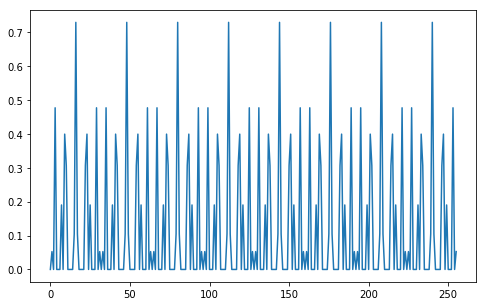

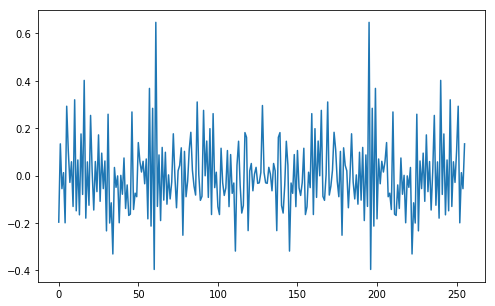

In [2]:
equi_under_sample = np.zeros(256)
for i in range(32):
    equi_under_sample[i * 8] = fourier_transform[i * 8]
fig, ax = plt.subplots(figsize=(8, 5))
plt.plot(ifft(equi_under_sample) * 8)

random_under_sample = np.zeros(256)
indices = np.random.choice(256, 32, replace=False)
for index in indices:
    random_under_sample[index] = fourier_transform[index]
fig, ax = plt.subplots(figsize=(8, 5))
plt.plot(ifft(random_under_sample) * 8)

/home/anon/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:11: ComplexWarning: Casting complex values to real discards the imaginary part


Text(0,0.5,u'RMSE')

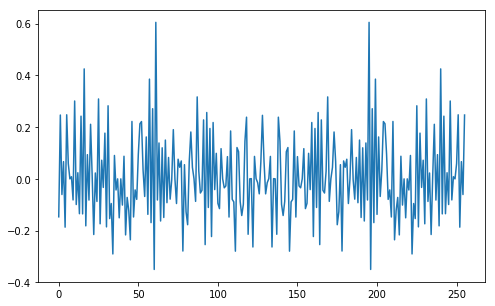

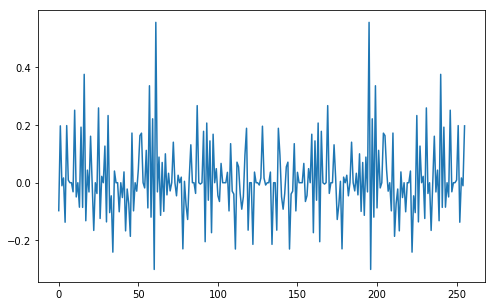

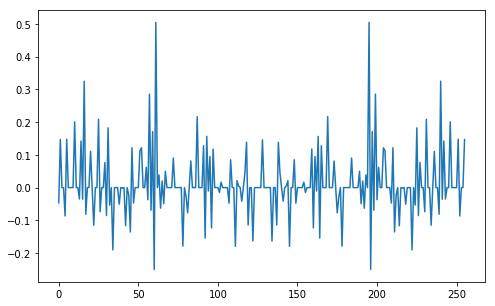

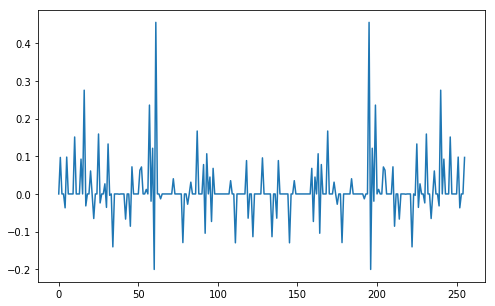

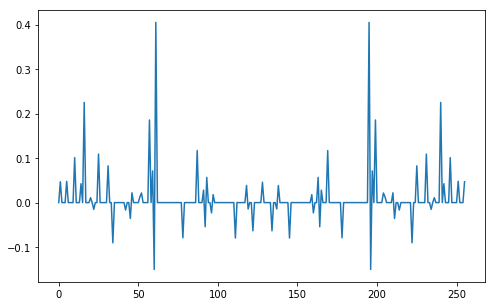

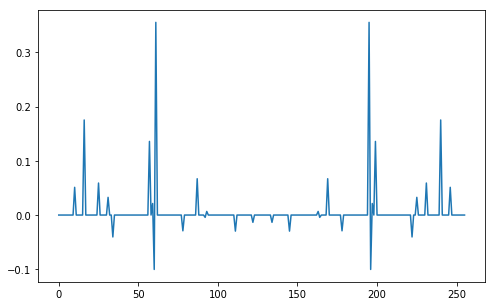

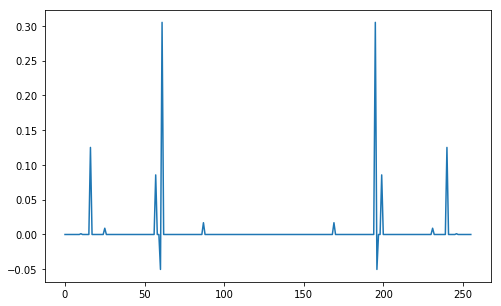

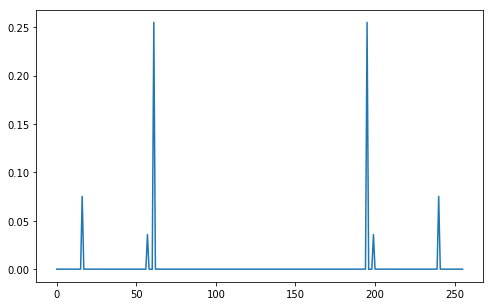

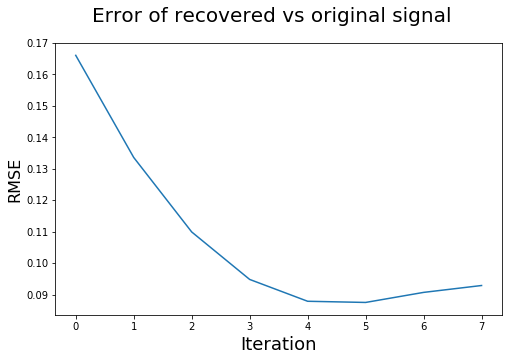

In [6]:
import pywt
from sklearn.metrics import mean_squared_error
from math import sqrt

compare = ifft(random_under_sample) * 8 # soft thresholding is applied to this

error = []
# apply soft thresholding iteratively and plot error rate against iteration
for i in range(8):
    compare = pywt.threshold(compare, 0.05, 'soft')
    rms = sqrt(mean_squared_error(compare, x))
    error.append(rms)
    fig, ax = plt.subplots(figsize=(8, 5))
    plt.plot(compare)

fig, ax = plt.subplots(figsize=(8, 5))
plt.plot(error)
fig.suptitle('Error of recovered vs original signal', fontsize=20)
plt.xlabel('Iteration', fontsize=18)
plt.ylabel('RMSE', fontsize=16)